**Practice to make a polynmial in numpy.**

```
import numpy as np
x=[1,2,3]
np.poly1d(x)
```



In [ ]:
import numpy as np
x=[1,2,3] # here 1,2,3 are coefficients of the polynomial in descending order
Poly1=np.poly1d(x)
print(Poly1)

Poly2=np.poly1d(x,True) #another format to print polynomial
print(Poly2)

   2
1 x + 2 x + 3
   3     2
1 x - 6 x + 11 x - 6



**Code to read data from a CSV file**
```
import pandas as pd
import numpy as np

# Read data from CSV file
df = pd.read_csv('data.csv')

# Convert data to numpy arrays
x = df['x values'].values
y = df['y values'].values

```



**Function for getting Lagrange Polynmial**


In [5]:
import pandas as pd
import numpy as np

x = [0, 20,40,60, 80, 100]
y = [26.0, -48.6, 61.6, -71.2, 74.8, -75.2]


# Function to calculate Lagrange polynomial
def lagrange_poly(x, y):
    n = len(x)
    p = np.poly1d(0.0)
    for i in range(n):
        L = np.poly1d(y[i])
        for j in range(n):
            if j != i:
                L *= np.poly1d([1.0, -x[j]]) / (x[i] - x[j])
        p += L
    return p

# Calculate Lagrange polynomial
p = lagrange_poly(x, y)
print(p)

            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26


**For Interpolating at a specific point**

In [6]:
# Interpolate at a specific point
point = float(input("Enter x-coordinate to interpolate: "))
interp_value = p(point)

# Print Lagrange polynomial and interpolated value
print("Lagrange polynomial is:")
print(p)
print("Interpolated value at x =", point, "is:", interp_value)


Enter x-coordinate to interpolate: 5
Lagrange polynomial is:
            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26
Interpolated value at x = 5.0 is: -126.77229003906251


# **TASK # 01**
---
Solve the above problem manually (Hand written & verify the polynomial & Interpolated value at x = 50
Show all the necessary steps and submitted in the form of PDF along with the project/.ipynb file at GCR

**Plotting of Lagrange Polynomial**

            5            4          3         2
-5.329e-06 x + 0.001313 x - 0.1132 x + 3.985 x - 47.81 x + 26


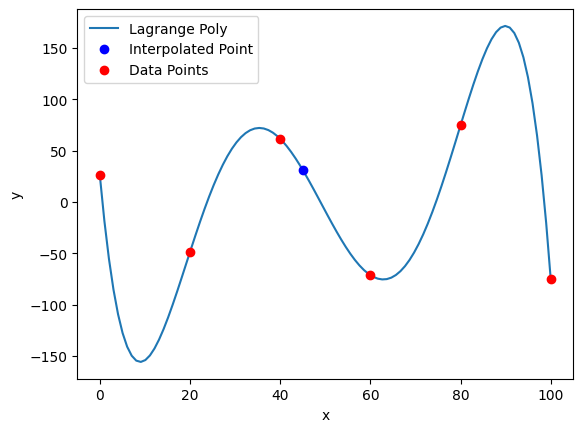

In [7]:
import matplotlib.pyplot as plt
xi=45
yi=31.29079589843832
p = lagrange_poly(x[0:6], y[0:6])
print(p)
xp=np.linspace(0,x[5],100)
yp=p(xp)

plt.plot(xp, yp, label='Lagrange Poly')
plt.plot(xi, yi, 'bo', label='Interpolated Point')
plt.plot(x[0:6], y[0:6], 'ro', label='Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

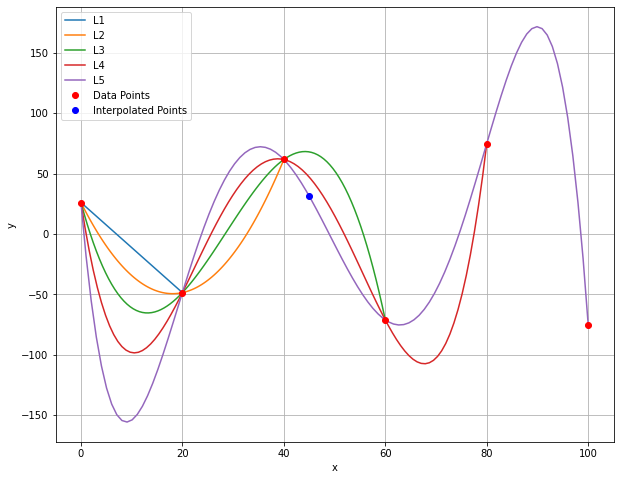

In [ ]:
fig = plt.figure(figsize = (10,8))
x = [0, 20,40,60, 80, 100]
y = [26.0, -48.6, 61.6,-71.2, 74.8, -75.2]
n=5
for i in range(1,n+1,1):
  p = lagrange_poly(x[0:i+1], y[0:i+1])
  xp=np.linspace(0,x[i],100)
  yp=p(xp)
  plt.plot(xp, yp, label = f"L{i}")
plt.plot(x,y,'ro',label="Data Points")
plt.plot(xi,yi,'bo',label="Interpolated Points")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


# **Scipy Implimentation of Lagrange Polynomial**

*Instead we calculate everything from scratch, in scipy, we can use the lagrange function directly to interpolate the data. Let’s see the above example*

P(50) = -8.76015624999853


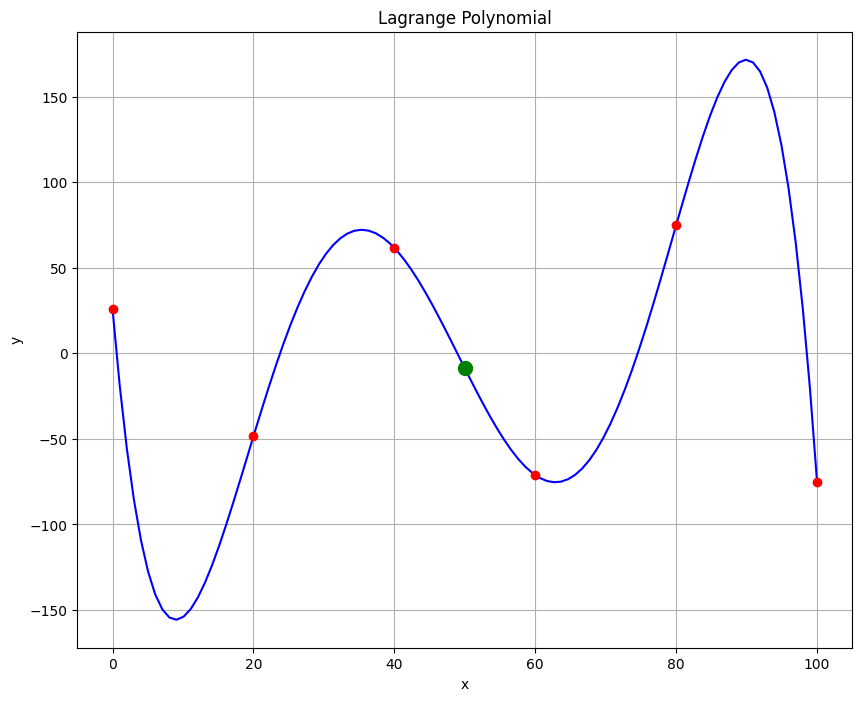

In [9]:
#Task1

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Function to calculate Lagrange polynomial
def lagrange_poly(x, y):
    n = len(x)
    p = np.poly1d(0.0)
    for i in range(n):
        L = np.poly1d(y[i])
        for j in range(n):
            if j != i:
                L *= np.poly1d([1.0, -x[j]]) / (x[i] - x[j])
        p += L
    return p

# Define the data points
x = np.array([0, 20, 40, 60, 80, 100])
y = np.array([26.0, -48.6, 61.6, -71.2, 74.8, -75.2])

# Define the Lagrange Polynomial
f = lagrange(x, y)

# Find P(50) by evaluating the polynomial at x=50
p_50 = f(50)
print("P(50) =", p_50)

# Plot the Lagrange Polynomial and the data points
x_new = np.linspace(0, 100, 100)
fig = plt.figure(figsize = (10,8))
plt.plot(x_new, f(x_new), 'b', x, y, 'ro')
plt.plot(50, p_50, 'go', markersize=10)
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# **Task # 02**
---
*Use the below code and apply the following alteration and show them along with plot*

**(i)**
Take input from user and show interpolation at that point along with its plot.

**(ii)** Also add a code that will display the polynomial too.

**Code for Newton divided difference Method**


Input a value for Newton divided difference: 50
Newton's divided difference polynomial:
        4         3         2
-20.46 x - 9.739 x - 6.117 x - 4.114 x + 22.49
Value at x = 50.0: -129120292.20323825


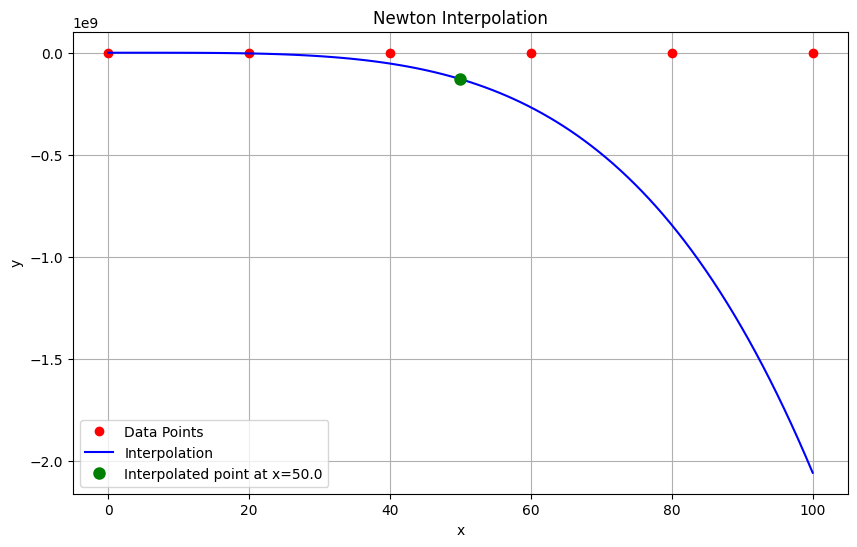

In [13]:
#Task2

import numpy as np
import matplotlib.pyplot as plt

def divided_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    return F

def newton_div_dif_poly(x, y, xi):
    F = divided_difference_table(x, y) # Saving divided difference in a variable F
    n = len(x)
    N = np.poly1d(F[0][0])
    for i in range(1, n):
        prod = np.poly1d([1]) # Initialize prod as a polynomial with coefficient 1
        for j in range(i):
            prod *= np.poly1d([-x[j], 1]) # (x - x[j])
        N += F[i][i] * prod

    print("Newton's divided difference polynomial:")
    print(N)
    print("Value at x = {}: {}".format(xi, N(xi)))
    return N

def plot_interpolation(x, y, xi, N):
    x_new = np.linspace(min(x), max(x), 100)
    y_interp = N(x_new)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'ro', label='Data Points')
    plt.plot(x_new, y_interp, 'b-', label='Interpolation')
    plt.plot(xi, N(xi), 'go', markersize=8, label=f'Interpolated point at x={xi}')
    plt.title('Newton Interpolation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

x = [0, 20, 40, 60, 80, 100]
y = [26.0, -48.6, 61.6, -71.2, 74.8, -75.2]

num = float(input("\nInput a value for Newton divided difference: "))

N = newton_div_dif_poly(x, y, num)
plot_interpolation(x, y, num, N)


# **Task # 03 (A)**
Use the above code by adding divided difference table code i.e. it will show divided difference table.



# **Task # 03 (B)**

With the help of **"pandas"** as shown at the starting of this lab session, read code from provided csv file & Write a code for Newton's forward divided difference. Print the polynomial and plot the interpolating point too.



# **Task # 03 (C)**
Do part 3(B) manually (Mentioned all steps and verify the result.   


Input a value for Newton divided difference: 50
Newton's divided difference polynomial:
        4         3         2
-20.46 x - 9.739 x - 6.117 x - 4.114 x + 22.49
Value at x = 50.0: -129120292.20323825

Divided Difference Table:
[26.0, 0, 0, 0, 0, 0]
[-48.6, -3.7299999999999995, 0, 0, 0, 0]
[61.6, 5.51, 0.23099999999999996, 0, 0, 0]
[-71.2, -6.640000000000001, -0.30375, -0.008912499999999999, 0, 0]
[74.8, 7.3, 0.34850000000000003, 0.010870833333333333, 0.00024729166666666666, 0]
[-75.2, -7.5, -0.37, -0.011975000000000001, -0.0002855729166666667, -5.3286458333333335e-06]


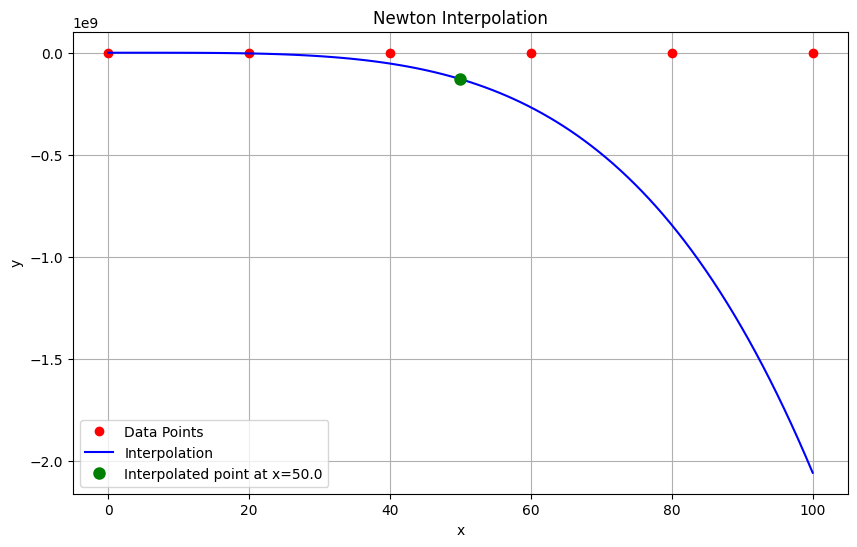

In [15]:
#Task 3A

import numpy as np
import matplotlib.pyplot as plt

def divided_difference_table(x, y):
    n = len(x)
    F = [[0] * n for i in range(n)]
    for i in range(n):
        F[i][0] = y[i]
    for j in range(1, n):
        for i in range(j, n):
            F[i][j] = (F[i][j-1] - F[i-1][j-1]) / (x[i] - x[i-j])
    return F

def newton_div_dif_poly(x, y, xi):
    F = divided_difference_table(x, y) # Saving divided difference in a variable F
    n = len(x)
    N = np.poly1d(F[0][0])
    for i in range(1, n):
        prod = np.poly1d([1]) # Initialize prod as a polynomial with coefficient 1
        for j in range(i):
            prod *= np.poly1d([-x[j], 1]) # (x - x[j])
        N += F[i][i] * prod

    print("Newton's divided difference polynomial:")
    print(N)
    print("Value at x = {}: {}".format(xi, N(xi)))
    return F, N

def plot_interpolation(x, y, xi, N):
    x_new = np.linspace(min(x), max(x), 100)
    y_interp = N(x_new)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'ro', label='Data Points')
    plt.plot(x_new, y_interp, 'b-', label='Interpolation')
    plt.plot(xi, N(xi), 'go', markersize=8, label=f'Interpolated point at x={xi}')
    plt.title('Newton Interpolation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

def display_divided_difference_table(F):
    print("\nDivided Difference Table:")
    for row in F:
        print(row)

x = [0, 20, 40, 60, 80, 100]
y = [26.0, -48.6, 61.6, -71.2, 74.8, -75.2]

num = float(input("\nInput a value for Newton divided difference: "))

F, N = newton_div_dif_poly(x, y, num)
display_divided_difference_table(F)
plot_interpolation(x, y, num, N)


Enter x coordinate for interpolation: 50
Interpolated value at x = 50.0: 28.78024438793945


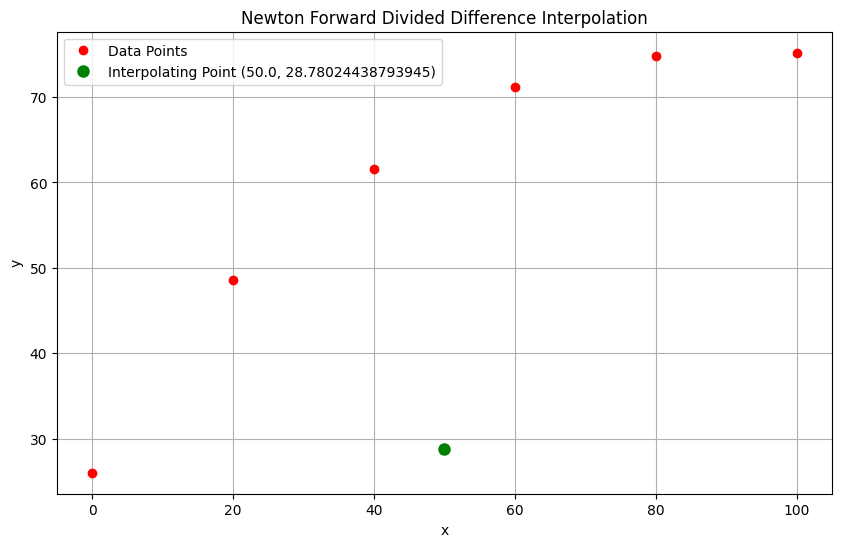

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('data.csv')
x = data['x'].values
y = data['y'].values

def divided_difference_table(x, y):
    n = len(x)
    F = np.zeros((n, n))
    F[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            F[i, j] = (F[i+1, j-1] - F[i, j-1]) / (x[i+j] - x[i])

    return F

def newton_forward_divided_difference(x, y, xi):
    F = divided_difference_table(x, y)
    n = len(x)

    N = y[0]
    prod = 1
    for j in range(1, n):
        prod *= (xi - x[j-1]) / (x[j] - x[j-1])
        N += prod * F[0, j]

    return N

def plot_interpolation(x, y, xi, yi):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'ro', label='Data Points')
    plt.plot(xi, yi, 'go', markersize=8, label=f'Interpolating Point ({xi}, {yi})')
    plt.title('Newton Forward Divided Difference Interpolation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

xi = float(input("Enter x coordinate for interpolation: "))

yi = newton_forward_divided_difference(x, y, xi)
print(f"Interpolated value at x = {xi}: {yi}")

plot_interpolation(x, y, xi, yi)
